# Linear regression
X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_21760\135460007.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
crime_df =pd.read_csv("crime_data.csv")
crime_df.head(10)

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24
5,603,260,25,68,8,32,15
6,484,325,34,68,12,24,14
7,546,102,33,62,13,28,11
8,424,38,36,69,7,25,12
9,548,226,31,66,9,58,15


In [3]:
crime_df.corr()

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


<Axes: >

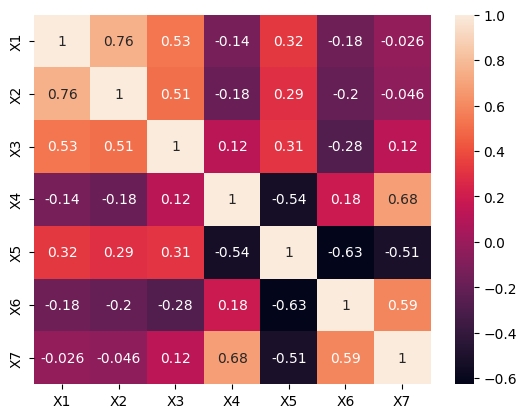

In [4]:
sns.heatmap(crime_df.corr(), annot=True)

In [8]:
from sklearn.linear_model import LinearRegression

crime_df = crime_df[['X5','X1']]
# x is what wer are using to predict
x=np.array(crime_df['X5']).reshape(-1,1)
#y is what we are predicting
y=np.array(crime_df['X1']).reshape(-1,1)

#1 train-test split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state =32)


In [9]:
#create the model
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)


LinearRegression()

In [10]:
#predict new values
y_pred = regression_model.predict(X_test)
y_pred

array([[824.84992679],
       [676.62367582],
       [729.5616226 ],
       [687.21126518],
       [793.08715873],
       [623.68572905],
       [697.79885453],
       [644.86090776],
       [750.73680131],
       [740.14921195],
       [687.21126518],
       [740.14921195],
       [782.49956937],
       [729.5616226 ],
       [793.08715873]])

In [12]:
#r squared
accuracy_score = regression_model.score(X_test,y_test)
print(accuracy_score)

0.1533224430792084


In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.1533224430792084

<function matplotlib.pyplot.show(close=None, block=None)>

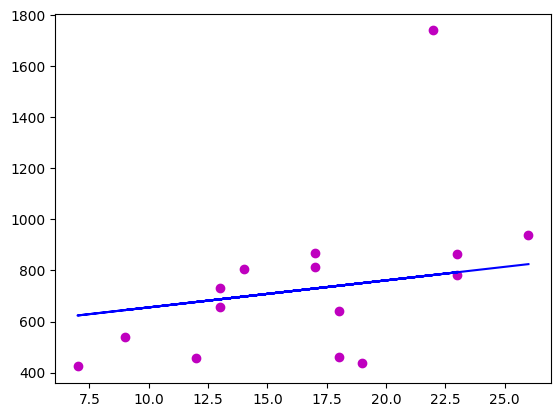

In [15]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color ='b')
plt.show

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [17]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


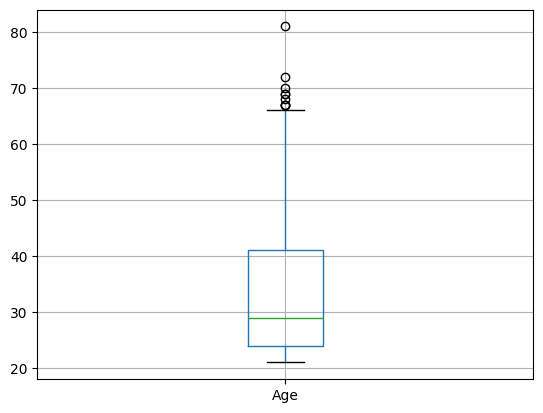

In [18]:
boxplot = diabetes_df.boxplot(column=["Age"], return_type = 'axes')

In [19]:
x = diabetes_df.drop('Outcome', axis = 1)
y= diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state =32)
# Standardize/Normalize - transforming vaslues so that the stard deviation is 1 and the mean is 0
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors  =13)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

print(y_predict)
print(type(y_predict))




[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0]
<class 'numpy.ndarray'>


In [20]:
print(knn.score(X_test,y_test))

0.7575757575757576


In [21]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual_Outcome'] =y_test.tolist()
diabetes_pred_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome
0,0.697044,0.737559,0.606740,-1.228946,-0.688269,-0.267561,-0.951916,1.549569,1
1,0.999139,0.581136,1.101819,0.197321,3.168763,-0.154661,-1.113399,0.922371,1
2,-0.511340,-0.138411,-3.353894,-1.228946,-0.688269,-1.509462,1.160293,3.520759,0
3,-0.511340,-0.889242,-0.680466,-0.396957,0.018854,-0.694073,0.889000,-0.959220,0
4,-0.813435,-0.044557,1.101819,1.801871,1.079538,2.266420,-0.477153,-0.152824,1
5,-0.813435,-1.045665,-0.284403,-0.515813,-0.342743,-0.556083,0.346414,-0.780021,0
6,-0.209244,0.268290,0.606740,-1.228946,-0.688269,0.347118,-0.228468,1.011971,1
7,0.999139,0.299574,0.804772,-1.228946,-0.688269,1.074696,0.721057,0.384774,0
8,1.603331,1.269398,0.804772,0.019037,-0.688269,-0.104483,1.157063,-0.063224,1
9,-0.511340,-1.514935,-0.185387,0.197321,-0.246317,-0.242472,-0.331818,0.026376,0


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test,y_predict)

array([[132,  15],
       [ 41,  43]], dtype=int64)

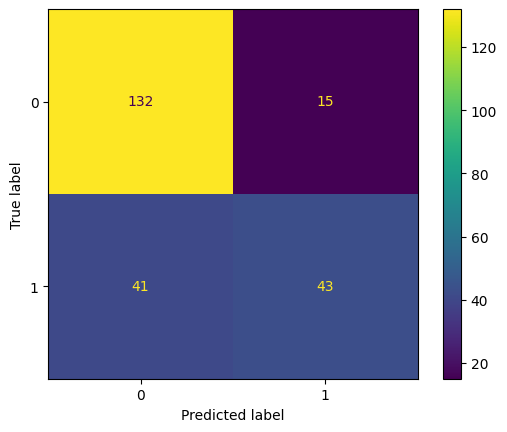

In [23]:
ConfusionMatrixDisplay.from_estimator(knn, X_test,y_test)